# Tutorial for using the code

We want our research to not only be reproducible, but also understandable. Much of this project is rather straight forward, but unfamiliarity with the way that the software works could hinder understanding. Therefore, we have provided this tutorial. It's aim is not to reproduce all of our results, but to demonstrate how parts of the code works and how to interact with it. 

## The preamble.
In order to use the code, it must be loaded. 

Everything is bundled as a Julia Application. This basically means that we have created a package which contains a manifest. This manifest lists, in detail, every dependency we have. When you instantiated the environment of this package (See README), you installed everything exactly like we specified. 

The package of this project is called LinearNodes and it is always imported in all scripts/notebooks. 

Some supporting functionality is provided by Plots.jl, FileIO.jl, JLD2.jl for plotting and parameter set saving/loading. These packages are not essential for the source code itself and is therefore only imported when needed. 

In [1]:
using Pkg
Pkg.activate("../")
using LinearNodes
using Plots
using FileIO
using JLD2
Plots.default(fmt=:png)

 Activating environment at `~/projects/LinearNodes.jl/Project.toml`
┌ Info: Precompiling LinearNodes [dc356400-b38c-11e8-23d5-a9b17e12309f]
└ @ Base loading.jl:1260
┌ Warning: `cse(expr, warn_enabled::Bool)` is deprecated, use `cse(expr, warn = warn_enabled)` instead.
│   caller = qualified_cse!(::Expr) at prelude.jl:63
└ @ ForwardDiff ~/.julia/packages/ForwardDiff/CrVlm/src/prelude.jl:63
┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1260


## Parameter sets
The main results of this project is the synthetic data and its corresponding fitted models (see article). These results are stored in a struct which essentially contains

- The parameter set used to generate the data (we do not store the full vector of data since it is easily reproducible using this parameter set). 
- The optimised parameter sets for different models, optimised towards the data. These models are
  -  5 different fixed-length mass action linear pathway models, of lengths 1-5.
  -  The fixed-rate model.
  -  The gamma model. Note that the mathematical function used is different depending on the input. For `DecayingInput`, we have a small and efficient function but for the others, we use the generalised, integral, version described in the paper.
  -  The DDE model.
-  Cost values associated with the fit of each model to the synthetic data.
-  The model types used for the simulation.
-  The input type used for the simulation

The already optimised and saved such sets can be loaded by: 

In [2]:
param_sets = load("../parameters/ResultGeneral.jld2", "pc")

param_sets

Parameter Collection with 30000 parameter sets.
1: [1.0, 0.010001852016436115, 0.014920990244001554, 0.057733009208550685, 0.038222692540387494, 0.22646727950918008, 3.6756973114833302, 0.11964126808673267, 1.5100419465455353, 0.17659313584317896, 1.2103377977961254, 3.338484134016519, 0.022861177649455493, 0.01416215779265968, 0.014558695689640107, 0.025687762151273268, 8.643800722296982, 0.020845344976459648, 0.8321732346512163, 6.804826013512012, 2.2706856546910976, 1.5620214200851756, 1.759549729073571, 0.018262111135554166, 1.0434889558782752, 0.7505358165544783, 7.006292589096432, 0.01179926901116945, 1.4557970643265112, 8.57456956613945, 0.3143844209494756, 0.01256741542905102, 3.658852004569254, 2.386923344107422, 0.017452354628013717, 0.02288222664569243, 0.8386797973753004, 1.2769493583605689] for model: FixedStepModel
2: [1.0, 0.01002769378210199, 0.4938648864866172, 0.14143868450706032, 3.646596707726574, 1.4841139243927113, 0.10310571068856646, 6.707167984344476, 4.6819193

This `param_sets` object (sometimes called `pc` in the code, for "parameter collection") have a series of method overloads to make them useful. 

First, the individual structs can be accessed by indexing:

In [3]:
p = param_sets[1]

38-element ResultGeneral{ImpulseInput,GammaModel}:
1:  1.0
2:  0.010001852016436115
3:  0.014920990244001554
4:  0.057733009208550685
5:  0.038222692540387494
6:  0.22646727950918008
7:  3.6756973114833302
8:  0.11964126808673267
9:  1.5100419465455353
10: 0.17659313584317896
11: 1.2103377977961254
12: 3.338484134016519
13: 0.022861177649455493
14: 0.01416215779265968
15: 0.014558695689640107
16: 0.025687762151273268
17: 8.643800722296982
18: 0.020845344976459648
19: 0.8321732346512163
20: 6.804826013512012
21: 2.2706856546910976
22: 1.5620214200851756
23: 1.759549729073571
24: 0.018262111135554166
25: 1.0434889558782752
26: 0.7505358165544783
27: 7.006292589096432
28: 0.01179926901116945
29: 1.4557970643265112
30: 8.57456956613945
31: 0.3143844209494756
32: 0.01256741542905102
33: 3.658852004569254
34: 2.386923344107422
35: 0.017452354628013717
36: 0.02288222664569243
37: 0.8386797973753004
38: 1.2769493583605689


each struct contain the results from multiple model fits:


|      Field names |                                                                       Values |
| ----------------:| ----------------------------------------------------------------------------:|
|            model |                                                             FixedStepModel() |
|            param | [1.0, 5.36529, 1.88461, 1.02049, 2.08805, 2.52873, 8.49419, 5.56772, 3.8623] |
|            input |                                                                  WaveInput() |
|   one_node_param |                                                         [1.01296, 0.0964153] |
|    one_node_cost |                                                           0.2703381112773181 |
|   two_node_param |                                                [1.03098, 0.534944, 0.529874] |
|    two_node_cost |                                                           0.1879855733798415 |
| three_node_param |                                       [1.02532, 0.91388, 0.912363, 0.903725] |
|  three_node_cost |                                                          0.11913852462919698 |
|  four_node_param |                                  [1.021, 1.26552, 1.26467, 1.26587, 1.25697] |
|   four_node_cost |                                                          0.06591824044732884 |
|  five_node_param |                        [1.00985, 1.60964, 1.61331, 1.6124, 1.61141, 1.60293] |
|   five_node_cost |                                                         0.024634684809794236 |
| fixed_rate_model |                                                             FixedRateModel() |
| fixed_rate_param |                                                     [0.996475, 6.0, 1.95766] |
|  fixed_rate_cost |                                                         0.008113316714377232 |
|      gamma_model |                                                          GammaGeneralModel() |
|      gamma_param |                                                  [1.00958, 5.59287, 1.82353] |
|       gamma_cost |                                                         0.002550991834779358 |
|        dde_model |                                                                   DDEModel() |
|        dde_param |                                                 [1.00005, 1.75193, 0.552679] |
|         dde_cost |                                                        0.0068589068559007545 |
|            tstop |                                                                         30.0 |


The information in each field can be accessed by a dot notation, like `p.five_node_param`. You can access a given field from all the data sets by either using array concatenation `[p.two_node_param for p in param_sets]` or by indexing the `param_set` using the symbol for the field name, like this:

In [4]:
param_sets[:two_node_param]

30000-element Array{Array{Float64,1},1}:
 [0.7852487276384655, 0.002016182258426798, 0.002016771090342691]
 [1.1150331330534964, 0.00956686737287691, 0.009576407005943173]
 [0.8228207646541034, 0.003195006348702139, 0.0031951078938059836]
 [1.131533935133123, 0.0087143343366133, 0.0087187705950155]
 [1.1234544999275107, 0.008880438184825798, 0.00887770706534151]
 [1.05334474714366, 0.01113350954915799, 0.011152000858310735]
 [0.9976445760433529, 0.004651676156365986, 0.004649954223984792]
 [1.0658264962635136, 0.004828789495205692, 0.004827675193815097]
 [0.8561994995549105, 0.00300190149686917, 0.0030024419530234035]
 [0.787073842063797, 0.0036827189197004184, 0.0036835777944212887]
 [1.0473071795280051, 0.00393071462256594, 0.00393108595153955]
 [1.1584214160824913, 0.008576277573459303, 0.00857578373591747]
 [1.1046596084883993, 0.007241565179617398, 0.007241421823078437]
 ⋮
 [1.127435852382507, 0.007686977453516186, 0.007684254078291513]
 [0.9969290284686368, 0.18957380029069773, 1

### Parameter filtering
We have designed a terse way of filtering our parameter sets and we make heavy use of it throughout our code. The filtering is done via the `@filter` which essentially takes two arguments:
-  a collection of parameter sets and
-  a filter condition.

The macro can access the fields of the `param_sets` objects as if they were defined variables.

We can, for example, get all the parameter sets where the cost for the fixed-rate model was less than some value:

In [5]:
filtered_param_sets = @filter(param_sets, fixed_rate_cost < 0.001)

Parameter Collection with 581 parameter sets.
1: [1.0, 0.029495870438425612, 0.02709985384853168, 0.025177278656393996, 5.699016885398468] for model: FixedStepModel
2: [1.0, 0.010690169349996826, 0.03342549479291807, 0.03486996396515477, 0.016193168247137433, 1.3972119511882604, 0.015895561608829004, 0.07276271455362822, 0.03259320642739421, 0.02394633222770547, 0.2813484896636041, 0.020956364440171255, 0.03829651461776195, 0.14079778887093358, 0.184038190072918, 8.858778361635823, 0.07082665137855601, 1.7235816204322179, 0.038362612779177935, 0.01701092564885851, 0.9585372240212535, 1.0401729496200145, 0.013346890380022524, 0.08148570463805374, 7.650443180757954, 5.413830124902294, 0.22977814986032494, 0.13266334878438216, 0.039475317868627374, 4.965656270385923, 0.0952781833045542, 0.32085004096104747, 5.195374384431238, 2.6502118055447834] for model: FixedStepModel
3: [1.0, 0.010970742255092791, 1.129568406974997, 2.2264308718138426] for model: FixedStepModel
4: [1.0, 0.011155716511

We can also use chained conditionals:

In [6]:
@filter(param_sets, fixed_rate_cost < 0.03 && length(param) == 11 && input isa ImpulseInput)

Parameter Collection with 14 parameter sets.
1: [1.0, 0.018067844990041146, 0.35820685782401024, 9.946002246232657, 0.7502790687246532, 0.35305170940427705, 0.020325335256361935, 4.049856396360869, 0.05850770976365913, 3.7229486483484022, 0.029396611019610535] for model: FixedStepModel
2: [1.0, 0.021106733670961896, 0.023939784058142417, 0.02990323609764515, 0.2254064271313, 4.783665352007703, 0.14838113044602957, 2.8621260746121098, 9.146774877052568, 0.038795756661716224, 0.062479323051952085] for model: FixedStepModel
3: [1.0, 0.030889049485877347, 0.061876720986219234, 3.1525001652574334, 0.017094369652167134, 0.032352969336206995, 0.01265254931111841, 0.01425232865459556, 0.01742360372175978, 2.448210399893449, 0.16473614927936442] for model: FixedStepModel
4: [1.0, 0.048695172365536984, 0.9560109919291185, 9.326267775038648, 0.04633515179090054, 2.813478426947696, 2.3499680637380944, 0.6361440337115, 0.020993321159295787, 3.2056399838054173, 0.031729592008942396] for model: Fixed

Here, `length(param)` gives the length of the vector of parameters which generated the data. The parameters are [$\gamma$, $r_1$, ..., $r_n$]. `length(param)` thus gives the number of pathway steps plus one. 

Our most common use of this filtering is to separate out different inputs to the models.

In [7]:
noisy = @filter(param_sets, input isa AbstractNoiseInput)

Parameter Collection with 5000 parameter sets.
1: [1.0, 0.10009147045061338, 9.811626181611551, 4.427911661402861, 4.24093608994095, 4.907379471674115, 1.2662653724302981, 0.7861044578338166, 0.19301996924507014, 1.2609493773787002, 0.12217784834567164, 0.2001668957034313, 4.410049388486473, 0.1473775394767587, 5.924537036160542, 3.1387879374580137, 0.1732120836732146, 1.0187057946099214, 0.14281664392455704, 0.15233923115640083, 0.15970685266169257, 0.17742091389246514, 0.13263178473900222, 4.3907469354547715, 0.10055185481613246, 2.1359096978247116, 0.6504483976327566, 0.595077266328132, 7.066223842503517, 0.3333230395188722, 9.017764204356425, 0.11707308224051252, 0.1660590332662589, 3.3787103726396075] for model: FixedStepModel
2: [1.0, 0.10023228022386478, 0.5218331208985467, 4.006040024187622, 0.20695366262579307, 0.9153545930610061, 2.454452500557829, 0.6426559097035776, 0.19253502095731614] for model: FixedStepModel
3: [1.0, 0.10026864968396751, 0.14313986032470508, 4.739732257

## Plotting

We essentially have two ways to generate plots from out results. One of them is to use the previously mentioned ability to extract relevant vectors/matrices from our parameter set objects and simply plot them. For example:

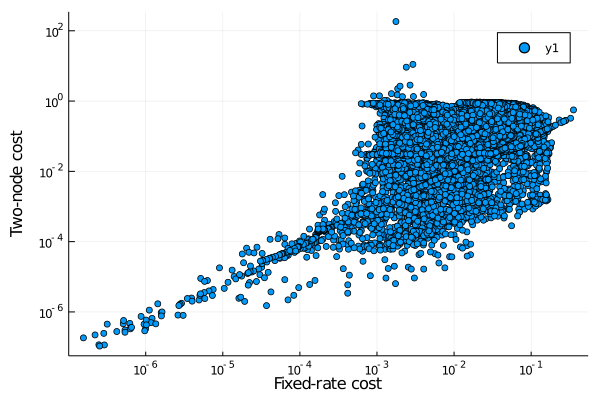

In [8]:
scatter(
    param_sets[:fixed_rate_cost], 
    param_sets[:two_node_cost], 
    xlabel="Fixed-rate cost", 
    ylabel="Two-node cost", 
    scale=:log10, 
    fmt=:png,
)

another tool that we have is "plot recipes". These have allowed us to specify both how the `plot` function should interpret our own types and to create our own  plotting functions.

A single parameter set, `p`, can for example be plotted with

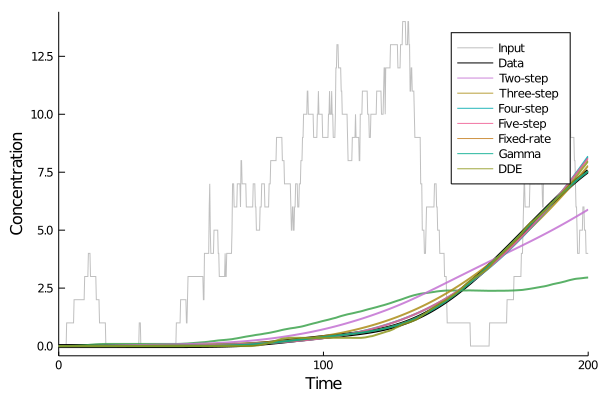

In [9]:
p = @filter(param_sets, input isa AbstractNoiseInput)[1]

plot(p)

We can specify which models should be plotted with the keyword argument `plotmodels`. The allowed values are
- `:input`
- `:data`
- `:fixed_rate`
- `:one_node` or `1` 
- `:two_node` or `2` 
- ...
- `gamma`
- `dde`

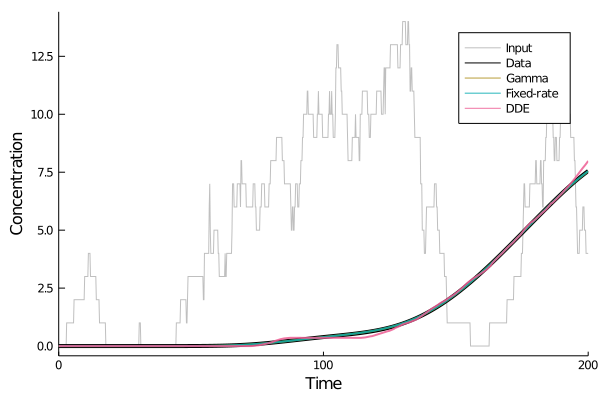

In [10]:
plot(p; plotmodels=[:input, :data, 1, 3, :gamma, :fixed_rate, :dde])

## Models and their simulation

The models can be found under `src/models.jl`. They are all empty types which just determine which methods to be used for different function calls.
- `FixedStepModel`
- `FixedRateModel`
- `GammaModel`
- `GammaGeneralModel`
- `DDEModel`

Every kind of input to the system has a similar type defined for them:
- `ImpulseInput`
- `DecayingInput`
- `StepInput`
- `WaveInput`
- `PiecewiseInput`
- `RampInput`
- `NoiseInput`
- `RepeatedNoiseInput`

where `RepeatedNoiseInput` can be used to re-use the same noise across simulations. This allows for optimisations and fair comparisons across models. 

Simulations are run using 
```julia
simulate(model, input, parameters; keyword_argument=:something)
```
They can be used like:

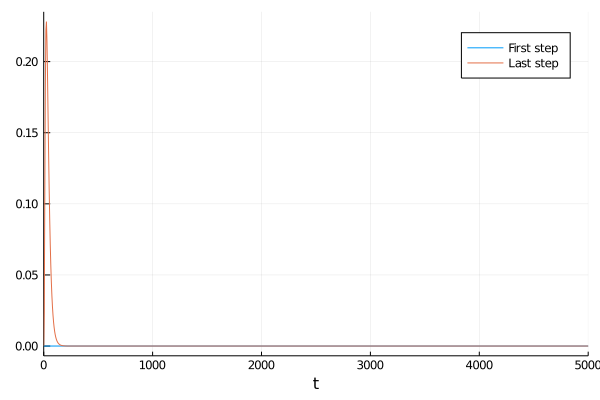

In [11]:
parameters = [10., 0.1, 0.5, 0.2, 0.8, 0.05] #  [γ, r₁, r₂, ..., rₙ], n is inferred from the vector length.
ode_solution = simulate(FixedStepModel(), ImpulseInput(), parameters)
plot(ode_solution, label=["First step" "Last step"])

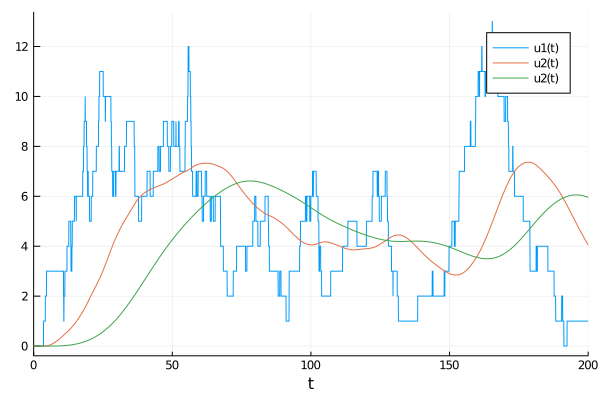

In [25]:
parameters = [1., 7, 0.8] #  [γ, n, r]
ode_solution = simulate(FixedRateModel(), NoiseInput(), parameters, tstop=200)

# re-use the same noise for a different model
noise = RepeatedNoiseInput(ode_solution)
new_parameters = [1., 2., 0.1]
ode_solution_2 = simulate(FixedRateModel(), noise, new_parameters, tstop=200)
new_parameters = [1., 4., 0.1]
ode_solution_3 = simulate(FixedRateModel(), noise, new_parameters, tstop=200)
plot(ode_solution_2)
plot!(ode_solution_3, vars=2)

## Optimisation

All of the optimisation is done using the `opt` function in `src/optimise.jl`. This function actually preforms several actions: 

1. Draw a random vector of parameters. 
2. Generate synthetic data using that vector and the input you supplied to the `opt` function.
3. Fit all of our models to that data (1-5 fixed-step, fixed-rate, the DDE and the gamma model).
4. Store the results in our parameter type and return that object.

The `opt` function takes at least one input which specifies which model input should be used (see above). You can also supply an optional vector of parameters which makes the function skip step 1. and use your vector directly in step 2 instead. You can find more on this in the `notebooks/optimise.ipynb` notebook but we'll supply one example here.

Julia does some compilations the first time a function is run. The first run is thus slower than the rest. Expect this to take just about one coffee break. 

In [ ]:
new_param = opt(ImpulseInput(); silent=false)

In [ ]:
plot(new_param; plotmodels=[:data, 1,2,3,4,5,:gamma, :homogeneous])

The actual optimisation that we used was parallelised and run via the script `scripts/parallel_opt.jl`
To execute this, using 8 cpu threads, navigate your terminal to the script folder and execute
```bash
julia -p 8 parallel_opt.jl
```
This would perform 5000 optimisations for each input type and it would take several days. We ourselves did this on a computer cluster using about 150 cpu cores over a weekend.

The result will be a file, `parameters/ResultGeneral.jld2`, which can be loaded like we did in the beginning of this document.

## Analysing the data

Here, we only give some very simple example to what can be done with the optimised results. 

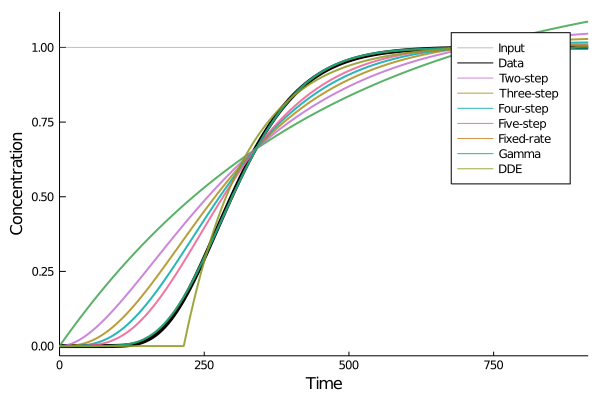

In [27]:
plot(param_sets[rand(1:end)]) # Pick a random data set to plot

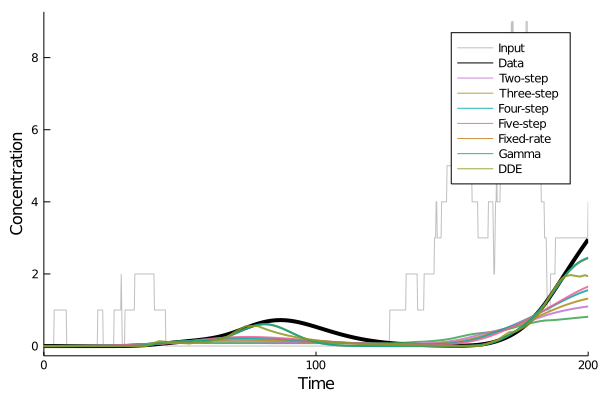

In [28]:
wost_cost, worst_index = findmax(param_sets[:fixed_rate_cost])
plot(param_sets[worst_index])

Parameter filtering is useful when you want to only analyse models for, say, a given input.

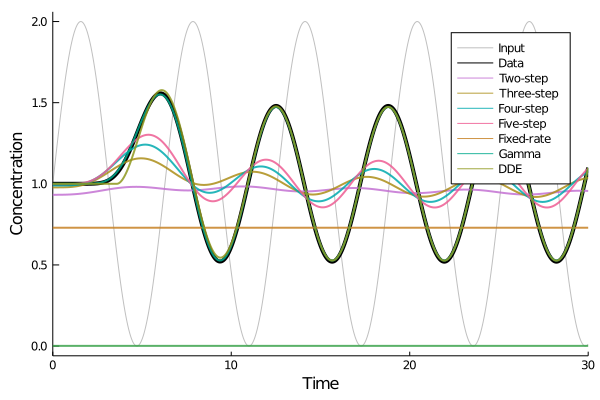

In [29]:
p_wave = @filter(param_sets, input isa WaveInput)

wost_cost, worst_index = findmax(p_wave[:fixed_rate_cost])
plot(p_wave[worst_index])

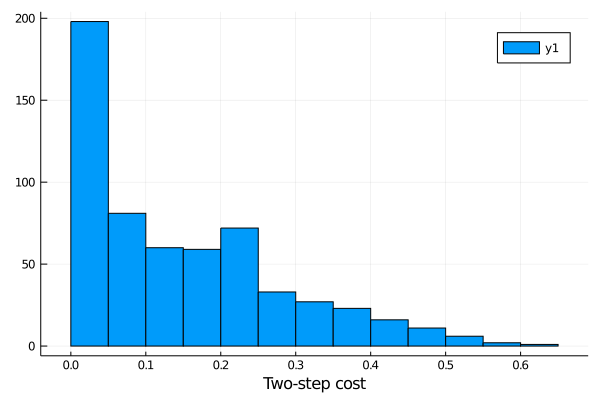

In [30]:
ten_node_params = @filter(param_sets, length(param) == 11)
histogram(ten_node_params[:two_node_cost]; xlabel="Two-step cost")

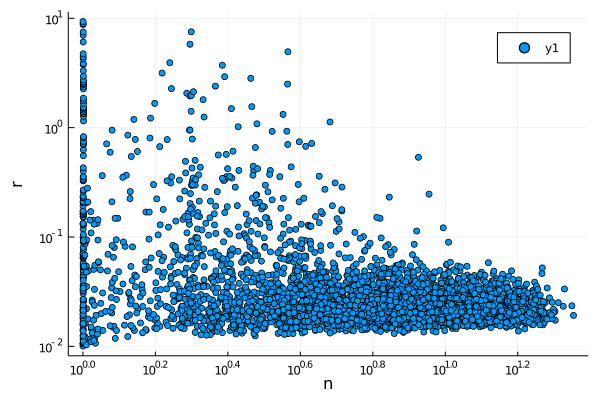

In [31]:
p_impulse = @filter(param_sets, input isa ImpulseInput)
scatter(
    [p.gamma_param[2] for p in p_impulse],
    [p.gamma_param[3] for p in p_impulse],
    xlabel="n",
    ylabel="r",
    scale=:log10,
)

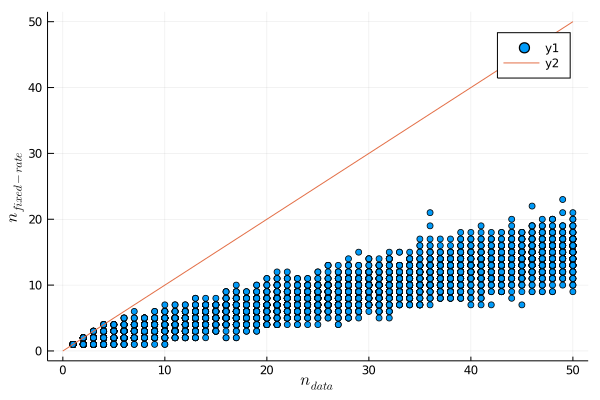

In [33]:
scatter(
    length.(p_impulse) .- 1,
    [p.fixed_rate_param[2] for p in p_impulse],
    xlabel=raw"$n_{data}$",
    ylabel=raw"$n_{fixed-rate}$",
)
plot!(x->x, 0:50)

## Plot recipes
When looking through the scipts that generated the figures in the papers you'll find calls to different plot recipes that we've defined (`src/plot_recipes.jl`). These plot recipes reduced the need to repeat ourselves when creating plots or subplots which are similar to one another. For example, by combining our plot recipe for plotting trajectories, 

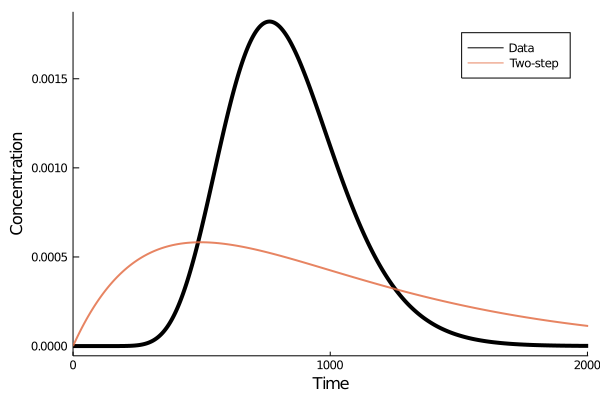

In [40]:
plot(p_impulse[1], plotmodels=[:data, :two_node])

with our recipe for how the pathway length affects the cost value, 

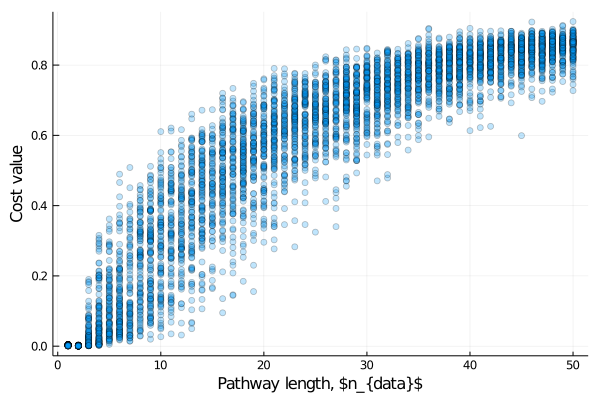

In [39]:
pathwaylengthcost(p_impulse, :two_node)

, we build up the more complex plot

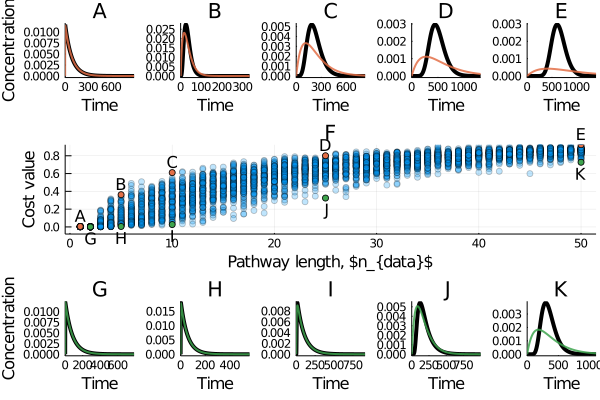

In [42]:
costdisplay(p_impulse, :two_node)

## Recap

With this, we hope to have given you a bit of an overview that makes it a lot easier to understand the code for this paper. To  fully understand every little detail, you'd need to read every line of code. But you'll get pretty far with just understanding that 
- the parameter set object holds lots of information and can easily be queried in many different ways,
- optimisation returns such a parameter object,
- `simulate` is the core of everything but seldom needs to be called explicitly,
- instead, plot recipes sort such things out for you and presents the final output. 